In [359]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats as st
import math as mth
import warnings
warnings.filterwarnings('ignore')

# Исследование источников трафика

### Предобработка

In [360]:
df = pd.read_csv('dataset.csv')
df.sample(10)

,User id,Media Source,Placement,CPI,Country Code,WIFI,Platform,Device Type,OS Version,Revenue (USD)
6773,1510601670964-2211568,Source 2,599d95d75169a3b070008c19,1.6,NL,True,ios,iPad 5,11,0.000000
7641,1510683051234-1941025,Source 2,56d53ef8a0bd0fa4700000c4,1.0,NO,True,ios,iPad Mini 4,11,0.000000
8512,1510761301307-3372829,Source 2,55c8b6a895057e365b000212,1.6,NL,True,ios,iPad Air 2,11,0.000000
9161,1510786287000-5549916,Source 2,5991ad5c9a165cfb58005ef6,1.6,UK,True,ios,iPhone 5c,10,2.625337
5132,1510505227046-3082490,Source 2,59d4efb60b9e07c12500358a,1.6,SE,True,ios,iPhone 5s,11,0.000000
6726,1510438771000-6460320,Source 3,26147,0.8,FR,True,ios,iPhone 5,10,0.000000
2490,1510299544686-3266595,Source 2,5461cb67ebc8b69a4800006e,1.6,SE,True,ios,iPad Air,10,0.000000
7790,1510688816000-7820290,Source 2,5645ea34d86cc1d66200000e,1.6,NL,True,ios,iPad 4,10,0.000000
2483,1510299621286-7599132,Source 2,576fa0c00e3f92a640000083,1.6,NL,True,ios,iPad Air,10,0.000000
7334,1510665142371-897562,Source 2,59d4efb60b9e07c12500358a,1.6,NL,True,ios,iPhone 5s,10,0.000000


In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9202 entries, 0 to 9201
Data columns (total 10 columns):
User id          9202 non-null object
Media Source     9202 non-null object
Placement        9202 non-null object
CPI              9202 non-null float64
Country Code     9202 non-null object
WIFI             9202 non-null bool
Platform         9202 non-null object
Device Type      9202 non-null object
OS Version       9202 non-null int64
Revenue (USD)    9202 non-null float64
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 656.1+ KB


In [362]:
for column in df.columns:
        if df[column].dtype == 'object':
        
            print(column)
        
            print()
        
            print(df[column].unique())
        
            print()
    
        else:
        
            print(column)
        
            print()
        
            print(df[column].describe())
        
            print()

User id

['1509498644000-2089177' '1509533912575-3168185' '1509531902000-4045807'
 ... '1510757264531-1142906' '1510789352196-3379853'
 '1510790058000-1007857']

Media Source

['Source 3' 'Source 1' 'Source 2']

Placement

['22564' '26147' '50117' '23924' 'xVa3' '33555' 'q6zK' 'Vf5R' 'q5Kt'
 'MHK4' 'IROd' 'g7oN' 'IvtR' 'g7qm' '96924' 'g7oc' 'qGDR' '64454' 'IVL9'
 'M4od' '45868' '95355' '106045' '45161' '45885' '40337' '47127' '95354'
 'VEIK' '44931' 'mv7R' 'mnjM' '36302' 'mSRp' 'tcd7' 'qJBz' 'Moai' 'M0BC'
 'irPz' 'q2mG' 'mJgg' 'VD0g' 'qo4U' 'Tqhi' 'IXmi' 'R5ug' 'MmjN' 'VRO'
 'qbUe' 'qJMm' 'q3A3' 'TyV8' 'Vgti' 'qUE7' 'IeSu' 'q5LK' '100838' 'VvmG'
 'ZUse' 'MJ34' 'M7CS' 'gHsc' 'VUr4' 'iNbd' 'Tmjo' 'IvSr' 'MihR' 'qmHV'
 'qyht' 'qdFe' 'xozr' 'TZAg' 'TVui' '47564' 'IYhR' 'pn3' '98754' 'ilYr'
 '108252' 'IyTe' '99595' 'MBdg' 'Mec9' 'MZjV' '241D' 'd2d' '66733' '66662'
 'VvsK' 'MMH7' 'I8Fi' 'mJiR' 'hmWp' 'MX9g' 'qezG' 'Tmpf' '39157' 'I8FG'
 '55428' '36857' 'qJ42' 'hk3R' 'xXsf' '46279' 'i9zi' 'hC

In [363]:
df.columns.tolist()

['User id',
 'Media Source',
 'Placement',
 'CPI',
 'Country Code',
 'WIFI',
 'Platform',
 'Device Type',
 'OS Version',
 'Revenue (USD)']

In [364]:
df = df.rename(columns = {'User id':'uid', 'Media Source':'media_source', 'Placement':'placement', 'CPI':'cpi',  'Country Code':'country_code', 'WIFI':'wifi', 'Platform':'platform','Device Type':'device_type', 'OS Version':'os_version', 'Revenue (USD)':'revenue_usd'})

In [365]:
df.duplicated().sum()

0

Дубликатов нет

Среди уникальных значений столбца `country_code` обнаружены пропуски.

In [366]:
df[df['country_code'] == 'None']

,uid,media_source,placement,cpi,country_code,wifi,platform,device_type,os_version,revenue_usd
6373,1510562474325-5255748,Source 2,537b2ea64fb7cc61630002a0,1.6,None,True,ios,iPad Air,11,0.0


Такая запись всего одна. Избавляемся от нее - на выборку не повлияет.

In [367]:
df = df[df['country_code'] != 'None']

In [368]:
df

,uid,media_source,placement,cpi,country_code,wifi,platform,device_type,os_version,revenue_usd
0,1509498644000-2089177,Source 3,22564,0.8,FR,True,ios,iPhone 5c,10,0.000000
1,1509533912575-3168185,Source 3,26147,0.8,AU,True,ios,iPad Air,10,0.000000
2,1509531902000-4045807,Source 3,50117,0.8,AU,True,ios,iPad Air,9,0.000000
3,1509434052619-6725738,Source 3,23924,1.0,US,True,ios,iPad Air 2,11,0.000000
4,1509471798000-7289726,Source 1,xVa3,1.0,US,True,ios,iPad 2,9,0.000000
...,...,...,...,...,...,...,...,...,...,...
9197,1510767826327-1749055,Source 2,59dcdf9dd09cd1c009006157,1.6,US,True,ios,iPhone 6s,11,0.000000
9198,1510677970349-8078579,Source 2,56572abbd4adae6874000022,1.6,US,False,ios,iPad Air 2,10,0.000000
9199,1510757264531-1142906,Source 2,59965c405169a3b070005a48,1.6,UK,True,ios,iPhone 7,11,11.913727
9200,1510789352196-3379853,Source 2,59dcdf9dd09cd1c009006157,1.6,UK,True,ios,iPhone 5s,10,0.000000


Датасет состоит из 9201 записей. При его рассмотрении дубликатов не обнаружено, типы данных соотвествуют столбцам.

В столбце `country_code` был обнаружен один пропуск и исключен.

Так как стандратное отклонение в столбце `revenue_usd` составляет 130, можем сделать вывод, что имеются выбросы. Рассмотрим в следующем разделе.

### ROI по источникам трафика

In [369]:
#Кол-во уникальных значений
df['media_source'].value_counts()

Source 2    6829
Source 1    1626
Source 3     746
Name: media_source, dtype: int64

Прежде чем производить расчет метрики изучим распределения данных, поскольку результаты могут искажаться аномалиями.

(array([9.199e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([    0.      ,  1023.764871,  2047.529742,  3071.294613,
         4095.059484,  5118.824355,  6142.589226,  7166.354097,
         8190.118968,  9213.883839, 10237.64871 ]),
 <a list of 10 Patch objects>)

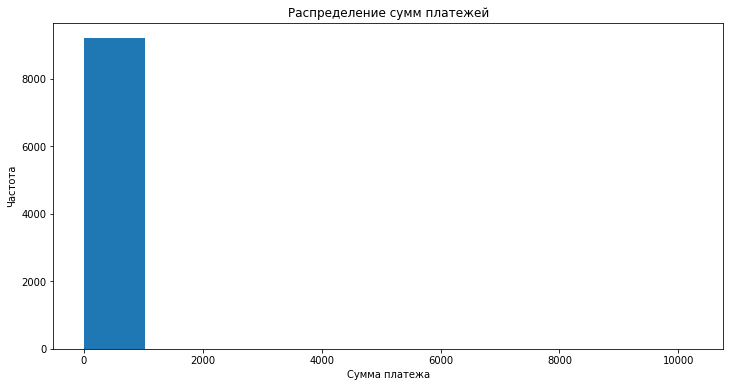

In [370]:
plt.figure(figsize = (12, 6))
plt.title('Распределение сумм платежей')
plt.xlabel('Сумма платежа')
plt.ylabel('Частота')
plt.hist(df['revenue_usd'])

Имеется длинный хвост аномальных значений. Рассмотрим его при приближении:

(array([9., 0., 0., 0., 0., 0., 1., 0., 0., 1.]),
 array([  100.,  1190.,  2280.,  3370.,  4460.,  5550.,  6640.,  7730.,
         8820.,  9910., 11000.]),
 <a list of 10 Patch objects>)

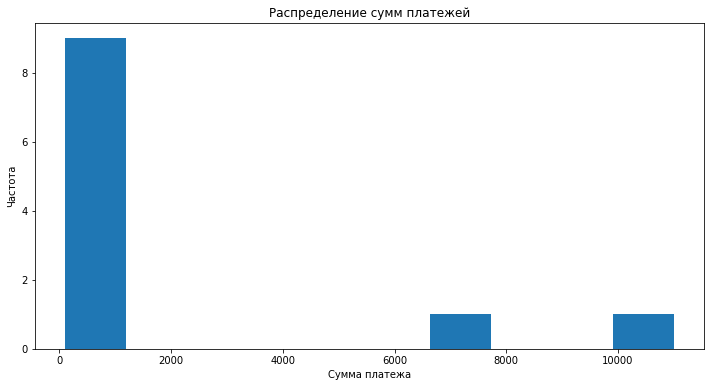

In [371]:
plt.figure(figsize = (12, 6))
plt.title('Распределение сумм платежей')
plt.xlabel('Сумма платежа')
plt.ylabel('Частота')
plt.hist(df['revenue_usd'], range = (100, 11000))

Пользователи, как правило в сумме не тратят более 50 долларов. Возможно, в выборку попали более 'старые' пользователи.

Принято отсеивать от 1% до 5% наблюдений с крайними значениями. Расчитаем 95 и 99 перцентили.

In [372]:
print(np.percentile(df['revenue_usd'], [95, 99]))

[ 0.   17.92]


Избавимся от записей с платежами более 17,92 долларов.

In [373]:
df_n = df[df['revenue_usd'] <= 17]
df_n.sample(10)

,uid,media_source,placement,cpi,country_code,wifi,platform,device_type,os_version,revenue_usd
3410,1510392070120-3008605,Source 2,56a1169c2ef5591f35000023,1.6,FR,True,ios,iPhone 6,11,0.0
5499,1510515861293-9926348,Source 2,59dcdf9dd09cd1c009006157,1.6,UK,True,ios,iPhone 7,10,0.0
6256,1510573435000-3568242,Source 2,537b2ea64fb7cc61630002a0,1.6,FR,False,ios,iPhone 5s,10,0.0
1991,1510099861666-7757374,Source 1,MHK4,0.8,UK,True,ios,iPhone 8 Plus,9,0.0
1686,1509962496900-1531322,Source 2,590b5df4004ccfdd3b000a35,1.0,NL,True,ios,iPad Air 2,11,0.0
5436,1510489725000-8449032,Source 2,5196a027a62035e1540000cb,1.6,US,True,ios,iPad Mini 2,10,0.0
7574,1510676587553-720783,Source 2,59dcdf9dd09cd1c009006157,1.6,UK,True,ios,iPhone 5s,11,0.0
3488,1510417439011-2211483,Source 2,599d95d75169a3b070008c19,1.6,NL,True,ios,iPad Air,11,0.0
2469,1510296341328-7988306,Source 2,52eb1d5c1fd94b2d1300000c,1.6,NL,False,ios,iPhone 5s,11,0.0
7560,1510600475214-2945709,Source 2,59d4efb60b9e07c12500358a,1.6,SE,True,ios,iPhone 5s,10,0.0


Расчитаем ROI по исходному и очищенному датафрейму и сравним полученные значения.

In [374]:
source=df.groupby(['media_source']).agg({'cpi': 'sum', 'revenue_usd':'sum'})
source['roi']=source['revenue_usd']-source['revenue_usd']*0.3  #комиссия AppStore = 30%
source

,cpi,revenue_usd,roi
media_source,,,
Source 1,1510.6,1398.410461,978.887323
Source 2,10481.6,20665.202056,14465.641439
Source 3,612.2,1105.274402,773.692081


In [375]:
roi = source.div(source['cpi'], axis = 0).drop(columns = ['cpi', 'revenue_usd'])
roi

,roi
media_source,
Source 1,0.648012
Source 2,1.380099
Source 3,1.263790


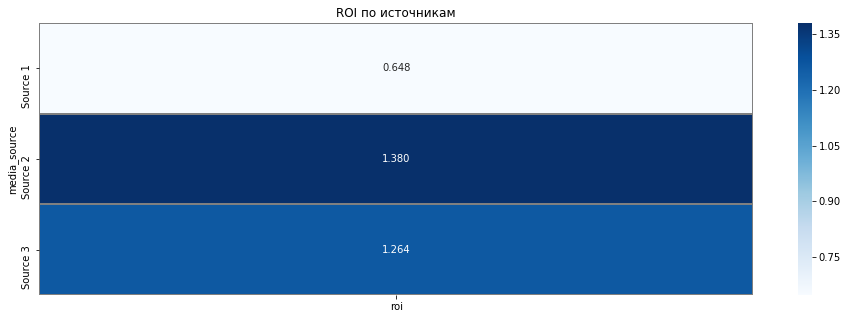

In [376]:
# считаем ROI

plt.figure(figsize=(16, 5))
plt.title('ROI по источникам')
sns.heatmap(roi, annot=True, fmt='.3f', linewidths=1, linecolor='gray', cmap = 'Blues')

Учитвая данные исходного датафрейма, из трех источников трафика не окупился только Source 1.

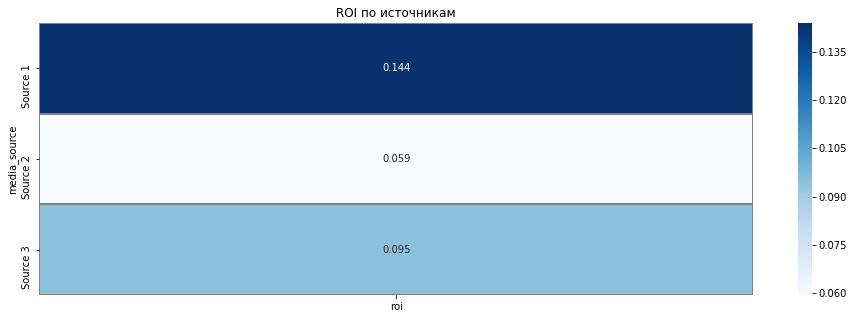

In [377]:
source_n=df_n.groupby(['media_source']).agg({'cpi': 'sum', 'revenue_usd':'sum'})
source_n['roi']=source_n['revenue_usd']-source_n['revenue_usd']*0.3  #комиссия AppStore = 30%
roi_n = source_n.div(source['cpi'], axis = 0).drop(columns = ['cpi', 'revenue_usd'])
plt.figure(figsize=(16, 5))
plt.title('ROI по источникам')
sns.heatmap(roi_n, annot=True, fmt='.3f', linewidths=1, linecolor='gray', cmap = 'Blues')

По очищенному датафрейму не окупились все три источника данных.

### ROI при увеличении CPI до 1,6 дол. по источнику трафика  Source 3

In [392]:
def cpi(row): #создаём функцию, принимающую один аргумент:cpi
    cpi = row['cpi']
    if row['media_source'] == 'Source 3' and row['country_code'] == 'US' :
        return 1.6
    else: 
        return cpi
   
df['cpi_new'] = df.apply(cpi, axis = 1)
df

,uid,media_source,placement,cpi,country_code,wifi,platform,device_type,os_version,revenue_usd,cpi_new
0,1509498644000-2089177,Source 3,22564,0.8,FR,True,ios,iPhone 5c,10,0.000000,0.8
1,1509533912575-3168185,Source 3,26147,0.8,AU,True,ios,iPad Air,10,0.000000,0.8
2,1509531902000-4045807,Source 3,50117,0.8,AU,True,ios,iPad Air,9,0.000000,0.8
3,1509434052619-6725738,Source 3,23924,1.0,US,True,ios,iPad Air 2,11,0.000000,1.6
4,1509471798000-7289726,Source 1,xVa3,1.0,US,True,ios,iPad 2,9,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...
9197,1510767826327-1749055,Source 2,59dcdf9dd09cd1c009006157,1.6,US,True,ios,iPhone 6s,11,0.000000,1.6
9198,1510677970349-8078579,Source 2,56572abbd4adae6874000022,1.6,US,False,ios,iPad Air 2,10,0.000000,1.6
9199,1510757264531-1142906,Source 2,59965c405169a3b070005a48,1.6,UK,True,ios,iPhone 7,11,11.913727,1.6
9200,1510789352196-3379853,Source 2,59dcdf9dd09cd1c009006157,1.6,UK,True,ios,iPhone 5s,10,0.000000,1.6


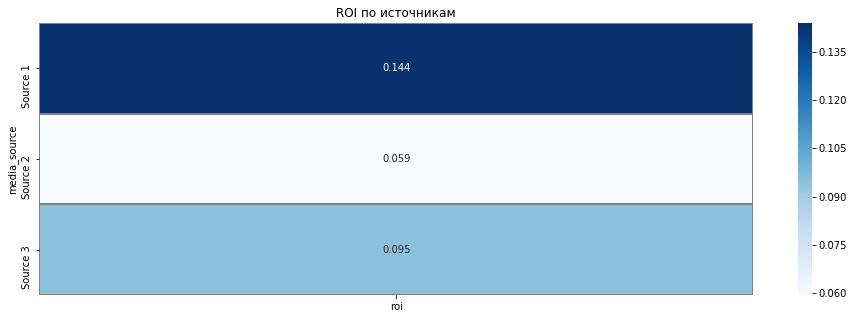

In [393]:
source_=df_n.groupby(['media_source']).agg({'cpi': 'sum', 'revenue_usd':'sum'})
source_n['roi']=source_n['revenue_usd']-source_n['revenue_usd']*0.3  #комиссия AppStore = 30%
roi_n = source_n.div(source['cpi'], axis = 0).drop(columns = ['cpi', 'revenue_usd'])
plt.figure(figsize=(16, 5))
plt.title('ROI по источникам')
sns.heatmap(roi_n, annot=True, fmt='.3f', linewidths=1, linecolor='gray', cmap = 'Blues')

Даже по неочищенному датафрейму третий источник трафика не окупается при увеличении CPI в USA до 6 долларов.
Поэтому данное меоприятие не рекомендуется.

### Конверсия в платящего в зависимости от наличия WiFi

Готовим выборки пользователей, использующих и не использующих WiFi при установке.

Так как даты транзакций у нас отсуствуют, чтобы несильно искажать результат, используем очищенный датафрейм.

In [333]:
wifi = df_n[df_n['wifi'] == True]
wifi.sample(10)

,uid,media_source,placement,cpi,country_code,wifi,platform,device_type,os_version,revenue_usd,payment
5778,1510506672961-273009,Source 2,537b2ea64fb7cc61630002a0,1.6,FR,True,ios,iPhone 6s,11,0.0,0
967,1509798717406-2060506,Source 1,2yBe,1.0,US,True,ios,iPhone 6s Plus,11,0.0,0
4357,1510484653128-8403971,Source 2,59dcdf9dd09cd1c009006157,1.6,UK,True,ios,iPhone SE,11,0.0,0
9151,1510785500560-3802516,Source 2,5991ad5c9a165cfb58005ef6,1.6,NO,True,ios,iPhone 7,11,0.0,0
8295,1510745970721-7834605,Source 2,56a1169c2ef5591f35000023,1.6,NL,True,ios,iPad 5,10,0.0,0
3258,1510399796000-3940693,Source 3,26147,0.8,FR,True,ios,iPhone 4s,9,0.0,0
8572,1510751532728-5646556,Source 2,59d4efb60b9e07c12500358a,1.6,NL,True,ios,iPhone 6,11,0.0,0
7369,1510662054000-8493005,Source 2,5991ad5c9a165cfb58005ef6,1.6,UK,True,ios,iPhone 5,10,0.0,0
5295,1510489262312-3749789,Source 2,5196a027a62035e1540000cb,1.6,US,True,ios,iPhone 6,11,0.0,0
1608,1509953964295-2488206,Source 2,5937fce04a607e854f000941,1.3,FR,True,ios,iPhone 6,11,0.0,0


In [334]:
notwifi = df_n[df_n['wifi'] == False]
notwifi.sample(10)

,uid,media_source,placement,cpi,country_code,wifi,platform,device_type,os_version,revenue_usd,payment
1400,1509894546046-5032219,Source 1,q6zK,1.0,US,False,ios,iPhone 7 Plus,11,0.000000,0
3203,1510397112000-5924194,Source 2,591d74f4e3b119532600168b,1.6,NL,False,ios,iPhone 5,10,0.000000,0
4613,1510402620631-7791299,Source 1,d2d,1.0,US,False,ios,iPhone 6s,10,0.000000,0
7666,1510672317843-7112018,Source 2,5991ad5c9a165cfb58005ef6,1.6,UK,False,ios,iPhone 6s,10,2.619365,1
8369,1510752934581-4320926,Source 2,59d4efb60b9e07c12500358a,1.6,NL,False,ios,iPhone 6s,10,0.000000,0
5939,1510521378320-3068596,Source 2,59dcdf9dd09cd1c009006157,1.6,US,False,ios,iPhone 7,10,0.000000,0
6760,1510600646372-7166289,Source 2,58d0e99878aed5dc7f0001d7,1.6,NL,False,ios,iPhone 7,11,0.000000,0
3879,1510421665450-1615820,Source 2,5735de75e02a8cfc550000b2,1.6,US,False,ios,iPhone 6s,11,14.930000,1
4661,1510497242321-7177917,Source 3,45161,0.8,FR,False,ios,iPhone SE,11,0.000000,0
7466,1510672563564-6433961,Source 2,59dcdf9dd09cd1c009006157,1.6,UK,False,ios,iPhone 7,11,0.000000,0


Конверсия в платящего для пользователей, установивших приложение через Wi-Fi:

In [335]:
len(wifi[wifi['revenue_usd'] > 0]) / len(wifi['uid'])

0.02230151650312221

Конверсия в платящего для пользователей, не использующих Wi-Fi:

In [336]:
len(notwifi[notwifi['revenue_usd'] > 0]) / len(notwifi['uid'])

0.030110935023771792

Проверим, насколько различие статистически значимо. Выше мы убедились, что значения имеют распределение отличное от нормального, значит применим статистический критерий Манна-Уитни.

Так как объем выборок больше 1000, задаем критический уровень значимости = 0,001.

###### Формулируем нулевую гипотезу:
Доля пользователей, совершивших платеж, равна среди пользователей, использующих wifi и не использующих.

###### Альтернативная гипотеза:
Доля пользователей, совершивших платеж, различается между группами пользователей использующих и не использующих wifi.

In [337]:
def payment(row): #создаём функцию, принимающую один аргумент:платеж
    revenue = row['revenue_usd']
    if revenue > 0:
        return 1
    if revenue == 0:
        return 0
   
wifi['payment'] = wifi.apply(payment, axis = 1)
notwifi['payment'] = notwifi.apply(payment, axis = 1)

In [338]:
payments_wifi = wifi.groupby('uid')['payment'].sum().reset_index()
payments_wifi

,uid,payment
0,1500824609000-3848881,0
1,1502019114550-7044211,0
2,1504348989656-9932209,0
3,1504596069118-9695463,0
4,1505586790000-5292270,0
...,...,...
7842,1510939393088-8745386,0
7843,1510993572000-3976793,0
7844,1511161455000-5628453,0
7845,1511176814000-6996189,0


In [339]:
payments_notwifi = notwifi.groupby('uid')['payment'].sum().reset_index()
payments_notwifi

,uid,payment
0,1506851831000-6369199,0
1,1507078038741-5913530,0
2,1507843752830-6733001,0
3,1507921566000-8998525,0
4,1508088149683-9777267,0
...,...,...
1257,1510785317394-7813052,0
1258,1510785883000-5218307,0
1259,1510785995688-7530624,0
1260,1510786741923-8314921,0


Объявим переменные, в которых пользователям из разных групп будет соответствовать количество платежей. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [340]:
sampleWIFI = pd.concat([payments_wifi['payment'],pd.Series(0, index=np.arange(wifi['uid'].nunique() - len(payments_wifi['payment'])), name='payment')],axis=0)

sampleNOTWIFI = pd.concat([payments_notwifi['payment'],pd.Series(0, index=np.arange(notwifi['uid'].nunique() - len(payments_notwifi['payment'])), name='payment')],axis=0) 

In [341]:
print("p-value: {0:.3f}".format(st.mannwhitneyu(sampleWIFI, sampleNOTWIFI)[1])) # критерий Манна-Уитни

print("Относительный прирост конверсии группы, не использующей WiFi: {0:.3f}".format(sampleNOTWIFI.mean()/sampleWIFI.mean()-1))

p-value: 0.044
Относительный прирост конверсии группы, не использующей WiFi: 0.350


Различие конверсии составило 35% в пользу группы, не использующей WiFi.

Но при этом p-value больше 0.001. Значит, исходя из имеющихся данных, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.

Но мы не знаем, когда были совершены данные платежи. Следует запросить дополнительные данные - дату начала сессии и дату транзакции, чтобы получить значение 'Кол-во пользователей в день', с помощью которого можно добиться более объективного результата теста.

### Анализ сегментов для оптимизации источников трафиков

Поскольку после очищения от выбивающихся значений все источники трафика оказались невыгодными, необходимо их оптимизировать.
Выведем графики конверсии по источникам трафика в различных разрезах данных.

In [342]:
def conv(df,a,b,c):
    df['payment'] = df.apply(payment, axis = 1)
    conv = df.groupby(['media_source',a]).agg({'uid':'nunique','payment':'sum'}).reset_index() # группируем страны и сортируем по убыванию

    conv['conversion'] = conv['payment']/conv['uid']
    conv = conv[['media_source',a,'uid','conversion']].sort_values(by = ['uid', 'media_source'], ascending = True)

    conv.columns = ['Источник трафика', b, 'Кол-во пользователей', 'Конверсия в платящего']
    display(conv.tail(10))

    fig = px.bar(conv, x = b, y = 'Кол-во пользователей', color = 'Конверсия в платящего', facet_col='Источник трафика', title = c)

    fig.show()

In [343]:
conv(df_n,'country_code', 'Страна', 'Конверсия по источникам в разрезе стран')
conv(df_n,'device_type', 'Устройство', 'Конверсия по источникам в разрезе устройств')
conv(df_n,'os_version', 'ОС', 'Конверсия по источникам в разрезе версии ОС')

,Источник трафика,Страна,Кол-во пользователей,Конверсия в платящего
13,Source 1,UK,224,0.040179
19,Source 2,DE,227,0.026432
30,Source 2,SE,290,0.013793
22,Source 2,FR,387,0.018088
37,Source 3,FR,423,0.011820
20,Source 2,DK,474,0.014768
33,Source 2,US,941,0.047821
14,Source 1,US,1024,0.028320
32,Source 2,UK,1613,0.028518
26,Source 2,NL,2744,0.009840


,Источник трафика,Устройство,Кол-во пользователей,Конверсия в платящего
21,Source 1,iPhone 7,329,0.048632
30,Source 2,iPad 5,396,0.007576
33,Source 2,iPad Mini 2,433,0.016166
50,Source 2,iPhone SE,472,0.021186
31,Source 2,iPad Air,500,0.016000
46,Source 2,iPhone 7,531,0.045198
32,Source 2,iPad Air 2,543,0.016575
44,Source 2,iPhone 6s,699,0.040057
42,Source 2,iPhone 6,753,0.017264
41,Source 2,iPhone 5s,948,0.013713


,Источник трафика,ОС,Кол-во пользователей,Конверсия в платящего
3,Source 2,9,12,0.000000
6,Source 3,9,88,0.022727
7,Source 3,10,256,0.007812
1,Source 1,10,268,0.055970
8,Source 3,11,379,0.036939
0,Source 1,9,612,0.001634
2,Source 1,11,725,0.046897
4,Source 2,10,2433,0.016441
5,Source 2,11,4336,0.024216


Для оптимизации всех источников трафика к отключению рекомендуются сегменты, имеющие минимальную конверсию, на которые приходится значительный объем в структуре пользователей.
    
Во-первых, отключению подлежат сегменты с 9 операционной системой.
Во-вторых, отключению подлежат сегменты, использующие устройства iPhone 5, iPhone 5s, iPhone6.
В-третьих, в разрезе стран к отключению рекомендуются:
* Франция по Source 1 и Source 3,
* Нидерланды и Швеция по Source 2